In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Factor Analysis

In [85]:
data = pd.read_excel('../data/survey.xlsx')

In [86]:
data.head()

,Timestamp,What is your age group?,What is your gender?,What is your primary occupation?,What is your monthly household income (INR)?,Which best describes your area of residence?,How often do you consume roti?,What are your primary sources of protein? (Select all that apply),How do you usually prepare or purchase roti? (Select all that apply),Have you ever purchased ready-to-cook or packaged rotis?,...,How likely are you to rely on online reviews/influencers or digital recommendations when choosing a new food product?,Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?,"If you are willing to try such a product, what would be your ideal pack size?",We’d love to hear your thoughts! Any additional comments or suggestions about protein-enhanced rotis?\nYou can also contact us at : t3b4grp@iima.ac.in,How frequently do you go to the gym or engage in regular exercise?,How sensitive are you to the shelf life of packaged food products?,How important is the shelf life of packaged food products for you?,How sensitive are you to preservatives in packaged food?,Do you prefer longer shelf life for packaged foods?,Column 34
0,2025-02-17 20:22:54.167,25–34,Male,Student,"More than 1,00,000",Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Eggs",Make it fresh at home,No,...,2,Yes,Pack of 4 rotis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-17 20:33:28.951,18–24,Male,Student,Prefer not to say,Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Lentils & Pulses...",Make it fresh at home,No,...,1,No,Pack of 4 rotis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-17 20:51:11.003,25–34,Male,Working professional,"More than 1,00,000",Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Lentils & Pulses",Make it fresh at home,No,...,4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-17 20:57:32.880,25–34,Male,Student,"50,000-1,00,000",Urban,2–3 times a week 3,"Eggs, Meat & Poultry, Protein Bars/Supplements","Make it fresh at home, Buy ready-to-eat packag...",Yes,...,3,Yes,Pack of 6 rotis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-17 21:55:58.597,25–34,Male,Student,Prefer not to say,Semi-urban,4–6 times a week,"Eggs, Meat & Poultry",Buy from a restaurant,Yes,...,5,Yes,Pack of 4 rotis,NaN,Once a week,I prefer products with a longer shelf life but...,NaN,NaN,NaN,NaN


In [87]:
list(data.columns).index('Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Taste & Texture]')

13

In [88]:
list(data[::].columns[13:19])

['Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Taste & Texture]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Nutritional value (including protein content)]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Shelf-life]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Price]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Packaging

In [89]:
data.iloc[:, 13:20]

,"Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Taste & Texture]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Nutritional value (including protein content)]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Shelf-life]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Price]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Packaging design]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Brand trust]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Convenience]"
0,Somewhat Important,Neutral,Somewhat Important,Neutral,Not important,Less Important,Somewhat Important
1,Not important,Not important,Not important,Not important,Not important,Not important,Not important
2,NaN,Somewhat Important,Neutral,Neutral,Neutral,Somewhat Important,Somewhat Important
3,NaN,Very Important,Somewhat Important,Neutral,Very Important,Neutral,Neutral
4,NaN,Not important,Less Important,Neutral,Neutral,Neutral,Very Important
...,...,...,...,...,...,...,...
107,NaN,Very Important,Very Important,Very Important,Somewhat Important,Somewhat Important,Somewhat Important
108,NaN,Very Important,Somewhat Important,Neutral,Less Important,Less Important,Somewhat Important
109,NaN,Neutral,Somewhat Important,Somewhat Important,Less Important,Very Important,Somewhat Important
110,NaN,Very Important,Somewhat Important,Somewhat Important,Neutral,Somewhat Important,Somewhat Important


In [90]:
df = data.iloc[:, 14:20]
df.rename(columns = dict(zip(list(data[::].columns[14:20]), ['Nutritional value', 'Shelf-life', 'Price', 'Packaging design',
       'Brand trust', 'Convenience'])) , inplace = True)

In [91]:
df.head()

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,Neutral,Somewhat Important,Neutral,Not important,Less Important,Somewhat Important
1,Not important,Not important,Not important,Not important,Not important,Not important
2,Somewhat Important,Neutral,Neutral,Neutral,Somewhat Important,Somewhat Important
3,Very Important,Somewhat Important,Neutral,Very Important,Neutral,Neutral
4,Not important,Less Important,Neutral,Neutral,Neutral,Very Important


In [92]:
len(df)

112

In [93]:
# # Load the data
# df = pd.read_excel('../data/factor_data.xlsx')
# df = df.dropna()    
# len(df)

In [94]:
# df.columns

In [95]:
df.head()

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,Neutral,Somewhat Important,Neutral,Not important,Less Important,Somewhat Important
1,Not important,Not important,Not important,Not important,Not important,Not important
2,Somewhat Important,Neutral,Neutral,Neutral,Somewhat Important,Somewhat Important
3,Very Important,Somewhat Important,Neutral,Very Important,Neutral,Neutral
4,Not important,Less Important,Neutral,Neutral,Neutral,Very Important


In [96]:
# Define the mapping
mapping = {
    'Not important': 1,
    'Less Important': 2,
    'Neutral': 3,
    'Somewhat Important': 4,
    'Very Important': 5
}

# Apply the mapping to the dataframe
factors = df.replace(mapping)
factors.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_17260\1701761953.py:11: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,3,4,3,1,2,4
1,1,1,1,1,1,1
2,4,3,3,3,4,4
3,5,4,3,5,3,3
4,1,2,3,3,3,5


In [97]:
# Calculate the correlation matrix
correlation_matrix = factors.corr()

# Plot the heatmap using Plotly
fig = px.imshow(correlation_matrix, 
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis')

fig.update_layout(title='Factor Analysis-Correlation Matrix Heatmap')
fig.show()

In [98]:
correlation_matrix

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
Nutritional value,1.000000,0.484111,0.336580,0.209671,0.525957,0.201327
Shelf-life,0.484111,1.000000,0.627126,0.211179,0.497577,0.415672
Price,0.336580,0.627126,1.000000,0.078632,0.531110,0.492729
Packaging design,0.209671,0.211179,0.078632,1.000000,0.289638,0.176582
Brand trust,0.525957,0.497577,0.531110,0.289638,1.000000,0.463708
Convenience,0.201327,0.415672,0.492729,0.176582,0.463708,1.000000


In [99]:
import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(factors)

In [100]:
kmo_model

0.7610091991824979

In [101]:
kmo_vars

array([0.73342426, 0.76789394, 0.73744723, 0.70511959, 0.77574191,
       0.81391991])

In [102]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(factors)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  197.63505321043615
p value :  6.42107375270824e-34


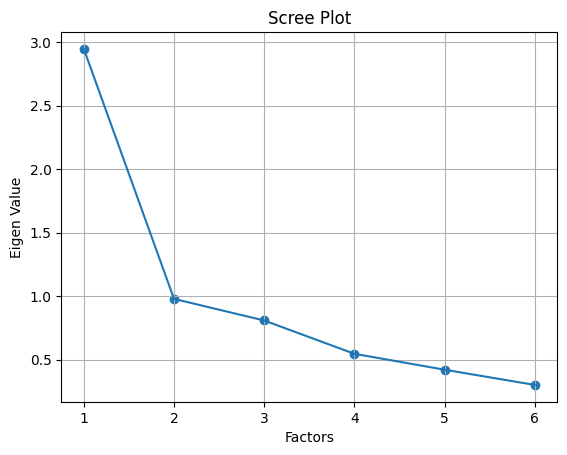

In [120]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,method='principal',impute = "drop",n_factors=factors.shape[1])
fa.fit(factors)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,factors.shape[1]+1),ev)
plt.plot(range(1,factors.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

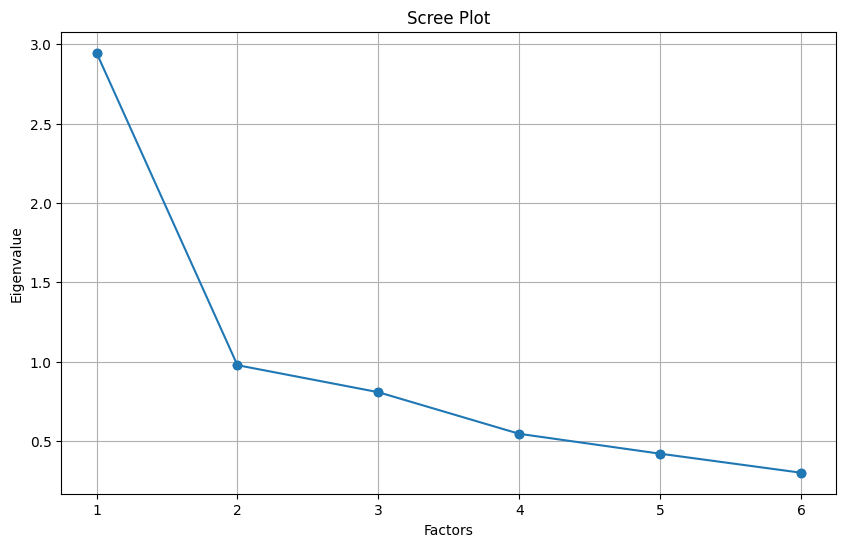

In [123]:
from factor_analyzer import FactorAnalyzer

import matplotlib.pyplot as plt

# Initialize the FactorAnalyzer with PCA method
fa = FactorAnalyzer(rotation=None, method='principal', n_factors=factors.shape[1])
fa.fit(factors)

# Get eigenvalues
ev, _ = fa.get_eigenvalues()

# Create scree plot
plt.figure(figsize=(10, 6))
plt.scatter(range(1, factors.shape[1] + 1), ev)
plt.plot(range(1, factors.shape[1] + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [119]:
FactorAnalyzer?

Init signature:
FactorAnalyzer(
    n_factors=3,
    rotation='promax',
    method='minres',
    use_smc=True,
    is_corr_matrix=False,
    bounds=(0.005, 1),
    impute='median',
    svd_method='randomized',
    rotation_kwargs=None,
)
Docstring:     
The main exploratory factor analysis class.

This class:
    (1) Fits a factor analysis model using minres, maximum likelihood,
        or principal factor extraction and returns the loading matrix
    (2) Optionally performs a rotation, with method including:

        (a) varimax (orthogonal rotation)
        (b) promax (oblique rotation)
        (c) oblimin (oblique rotation)
        (d) oblimax (orthogonal rotation)
        (e) quartimin (oblique rotation)
        (f) quartimax (orthogonal rotation)
        (g) equamax (orthogonal rotation)

Parameters
----------
n_factors : int, optional
    The number of factors to select.
    Defaults to 3.
rotation : str, optional
    The type of rotation to perform after fitting the factor analy

In [124]:
ev

array([2.94634806, 0.97824581, 0.80806205, 0.54590271, 0.42063233,
       0.30080905])

In [125]:
#rotated_component_matrix
fa = FactorAnalyzer(n_factors=2,rotation='varimax')
fa.fit(factors)
print(pd.DataFrame(fa.loadings_,index=factors.columns))

                          0         1
Nutritional value  0.265486  0.585582
Shelf-life         0.570498  0.459392
Price              0.991823  0.119219
Packaging design   0.050044  0.386774
Brand trust        0.448667  0.667737
Convenience        0.469383  0.295907


In [126]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1
Variance          1.803790  1.251188
Proportional Var  0.300632  0.208531
Cumulative Var    0.300632  0.509163


In [127]:
print(pd.DataFrame(fa.get_communalities(),index=factors.columns,columns=['Communalities']))

                   Communalities
Nutritional value       0.413389
Shelf-life              0.536509
Price                   0.997926
Packaging design        0.152099
Brand trust             0.647174
Convenience             0.307881


In [128]:
rotated_component_matrix = pd.DataFrame(fa.loadings_, index=factors.columns)
print(rotated_component_matrix)

                          0         1
Nutritional value  0.265486  0.585582
Shelf-life         0.570498  0.459392
Price              0.991823  0.119219
Packaging design   0.050044  0.386774
Brand trust        0.448667  0.667737
Convenience        0.469383  0.295907


### PCA

In [129]:
list(data.columns).index('Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?')

28

In [130]:
interest = data.iloc[::, 28]

In [131]:
mapping = {
    'Yes': 1,
    'No': 0,
    'Maybe': 0.5
}

# Apply the mapping to the dataframe
interest = interest.replace(mapping)
interest.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_17260\181251922.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?, dtype: float64

In [132]:
y = interest.values

In [133]:
factors

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,3,4,3,1,2,4
1,1,1,1,1,1,1
2,4,3,3,3,4,4
3,5,4,3,5,3,3
4,1,2,3,3,3,5
...,...,...,...,...,...,...
107,5,5,5,4,4,4
108,5,4,3,2,2,4
109,3,4,4,2,5,4
110,5,4,4,3,4,4


In [142]:
from sklearn.decomposition import PCA
# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(factors)

In [143]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[3.83844571 1.26936548]


In [144]:
pca.explained_variance_ratio_

array([0.48817961, 0.16143991])

In [149]:
fa._fit_principal(factors.values)

array([[-0.66453463,  0.23747019],
       [-0.80734877, -0.11470813],
       [-0.78062871, -0.38038193],
       [-0.37216734,  0.83570776],
       [-0.81310174,  0.096795  ],
       [-0.6662624 , -0.23712574]])

### Regression

In [151]:
X = reduced_data
Y = y

In [152]:
import statsmodels.api as sm
from scipy import stats

x = sm.add_constant(X)
model = sm.OLS(Y, x)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.540
Date:                Thu, 27 Feb 2025   Prob (F-statistic):             0.0128
Time:                        11:29:34   Log-Likelihood:                -29.929
No. Observations:                 112   AIC:                             65.86
Df Residuals:                     109   BIC:                             74.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8080      0.030     26.689      0.0

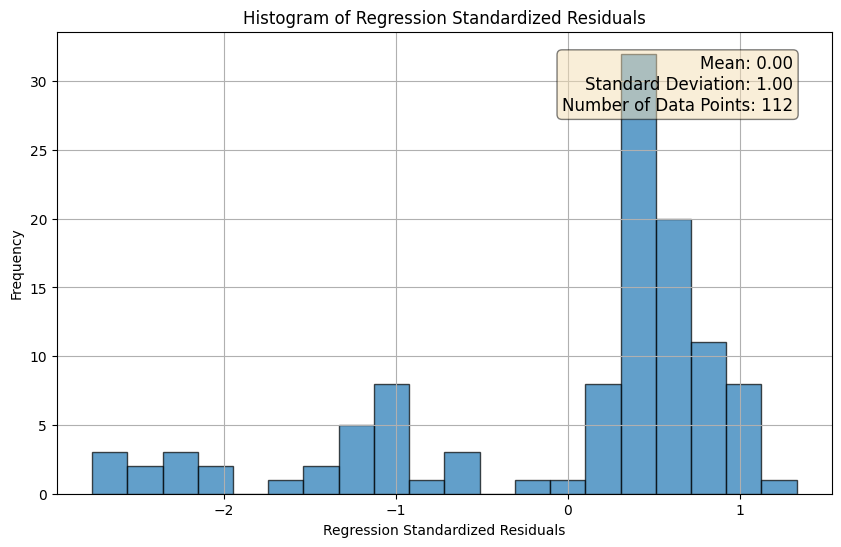

In [153]:
# Calculate the standardized residuals
standardized_residuals = (model.resid - np.mean(model.resid)) / np.std(model.resid)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(standardized_residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Regression Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Regression Standardized Residuals')

# Calculate statistics
mean_resid = np.mean(standardized_residuals)
std_resid = np.std(standardized_residuals)
num_data_points = len(standardized_residuals)

# Add text box with statistics
textstr = '\n'.join((
    f'Mean: {mean_resid:.2f}',
    f'Standard Deviation: {std_resid:.2f}',
    f'Number of Data Points: {num_data_points}'
))

# Place the text box in the plot
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='right', bbox=props)

plt.grid(True)
plt.show()

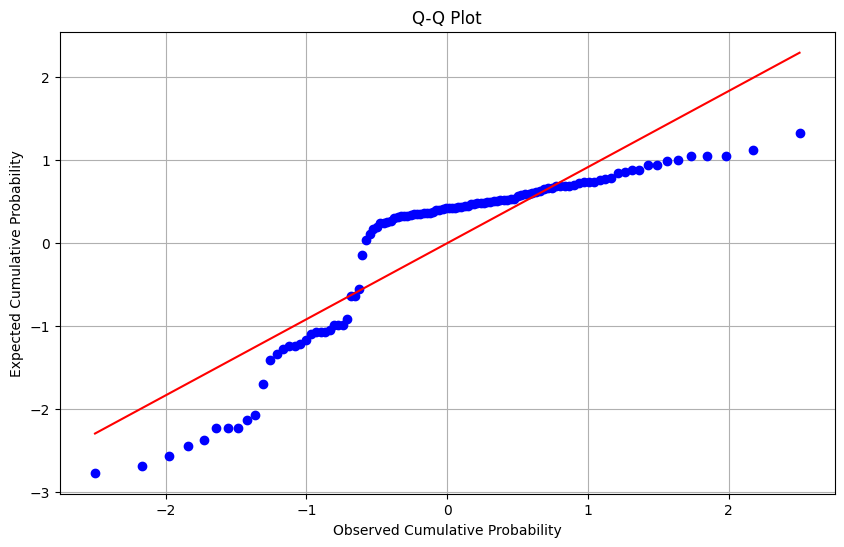

In [154]:
import scipy.stats as stats

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=ax)
ax.set_title('Q-Q Plot')
ax.set_xlabel('Observed Cumulative Probability')
ax.set_ylabel('Expected Cumulative Probability')
plt.grid(True)
plt.show()